# Data preparation

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydataset
import calendar

In [2]:
# Check out available datasets
print(sns.get_dataset_names())
print(data())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']
                dataset_id  \
0            AirPassengers   
1                  BJsales   
2                      BOD   
3             Formaldehyde   
4             HairEyeColor   
5             InsectSprays   
6           JohnsonJohnson   
7                LakeHuron   
8         LifeCycleSavings   
9                     Nile   
10           OrchardSprays   
11             PlantGrowth   
12               Puromycin   
13                 Titanic   
14             ToothGrowth   
15           UCBAdmissions   
16          UKDriverDeaths   
17                   UKgas   
18             USAccDeaths   
19               USArrests   
20          USJudgeRatings   
21   USPersonalExpenditure   
22                VADeaths   
23                WWWusage   
24             WorldPhones   
25                air

C:\Users\junjie.chu\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\junjie.chu\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


In [3]:
# Convert dictionary into pandas dataframe
data = {'Country':['United States', 'Germany', 'Great Britain', 'Russia', 'China'], 
        'Bronze':[67,67,26,35,35],
        'Gold':[137,47,64,50,44],
        'Silver':[52,43,55,28,30]
       }
medals = pd.DataFrame(data)

# Alternatively, convert np array into pandas dataframe
data = np.array([['United States',67,137,52],
                ['Germany',67,47,43],
                ['Great Britain',26,64,55],
                ['Russia',35,50,28],
                ['China',35,44,30]]
               )

medals = pd.DataFrame(data, columns = ['Country','Bronze','Gold','Silver'])

# Set proper index
medals.set_index('Country', inplace=True, drop=True)

# Set column types
medals = medals.astype('int32')

display(medals)

,Bronze,Gold,Silver
Country,,,
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


In [4]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
nottem = pydataset.data('nottem')
nottem['year'] = nottem['time'].astype('int32')
nottem['month'] = (nottem['time'] - nottem['year'])*12
nottem['month'] = [12 if round(x) == 0 else round(x) for x in nottem['month']]
nottem.head(20)
nottem_summary = nottem.groupby('month')['nottem'].agg([np.mean, np.std]).reset_index()
nottem_summary.head()

,month,mean,std
0,1,39.190,2.702221
1,2,42.195,2.555175
2,3,46.290,1.688007
3,4,52.560,1.675646
4,5,58.040,1.924742


In [9]:
newheaven = pydataset.data('nhtemp')
temperature = nottem.groupby('year')['nottem'].\
    agg(np.mean).reset_index().\
    merge(newheaven, how = 'inner', left_on = 'year', right_on = 'time').\
    rename({'nottem':'nottingham','nhtemp':'newheaven'}, axis = 1).\
    drop(columns = 'time').\
    melt(id_vars =['year'], var_name = 'area', value_name = 'temperature') 

temperature.head()

,year,area,temperature
0,1920,nottingham,48.891667
1,1921,nottingham,50.733333
2,1922,nottingham,47.275000
3,1923,nottingham,47.816667
4,1924,nottingham,48.725000


In [10]:
revenue = pydataset.data('freeny')
revenue.head()

,y,lag.quarterly.revenue,price.index,income.level,market.potential
1962.25,8.79236,8.79636,4.70997,5.82110,12.9699
1962.50,8.79137,8.79236,4.70217,5.82558,12.9733
1962.75,8.81486,8.79137,4.68944,5.83112,12.9774
1963.00,8.81301,8.81486,4.68558,5.84046,12.9806
1963.25,8.90751,8.81301,4.64019,5.85036,12.9831


# Matplotlib

In [11]:
plt.style.use("ggplot")

https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

### Bar chart

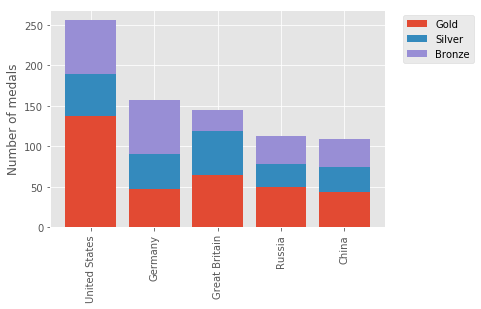

In [12]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals.Gold, label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals.Silver, bottom=medals.Gold, label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals.Bronze, bottom=medals.Gold + medals.Silver, label='Bronze')

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

# Display the legend
ax.legend(bbox_to_anchor = (1.04, 1), loc = "upper left")

plt.show()

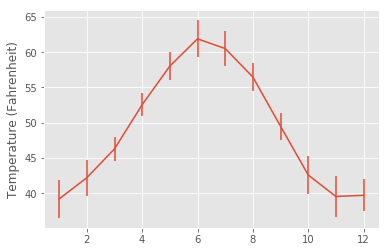

In [129]:
fig, ax = plt.subplots()

# Nottingham monthly temperature with error bars
ax.errorbar(nottem_summary.month, nottem_summary['mean'], yerr = nottem_summary['std'])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

### Histogram

Text(0, 0.5, '# of observations')

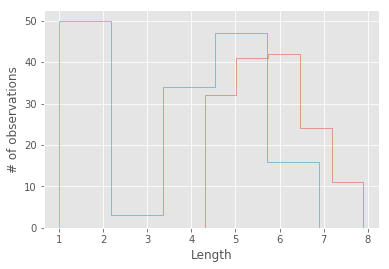

In [130]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(iris.sepal_length, label = 'sepal_length', histtype = 'step', bins = 5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(iris.petal_length, label = 'petal_length', histtype = 'step', bins = 5)

ax.set_xlabel("Length")
ax.set_ylabel("# of observations")

### Box plot

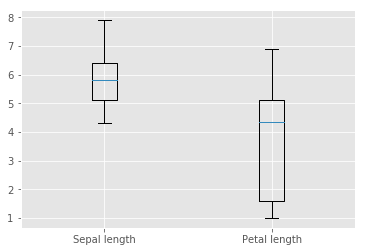

In [131]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([iris.sepal_length, iris.petal_length])

# Add x-axis tick labels:
ax.set_xticklabels(["Sepal length","Petal length"])

plt.show()

### Scatter plot

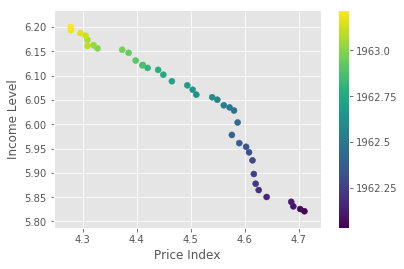

In [134]:
fig, ax = plt.subplots()

# Add scatter plot
smap = ax.scatter(revenue['price.index'], revenue['income.level'], c = revenue.index)

# Set axis label
ax.set_xlabel("Price Index")
ax.set_ylabel("Income Level")

# setup the colorbar
cb = fig.colorbar(smap, orientation='vertical')
cb.ax.set_yticklabels(revenue.index)

plt.show()

# Set fig size and save
fig.set_size_inches([5,5])
fig.savefig('figure_5_5.png')

# Seaborn

In [162]:
sns.set_style("whitegrid") # All options:"white","dark","whitegrid","darkgrid","ticks"

### Color palette
https://seaborn.pydata.org/tutorial/color_palettes.html

### Relational plots

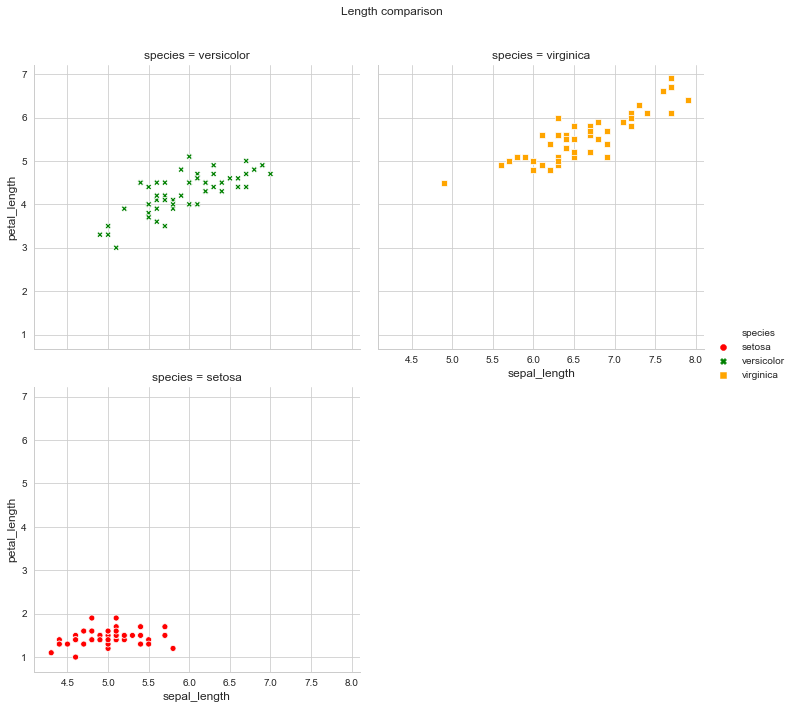

In [173]:
g = sns.relplot(x = 'sepal_length', 
                y = 'petal_length', 
                data = iris, 
                kind = 'scatter', 
                col = 'species',
                col_wrap = 2,
                col_order = ['versicolor', 'virginica', 'setosa'],
                hue = 'species',
                style = 'species'
               )

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Length comparison")
g.fig.subplots_adjust(top=.9)

plt.show()

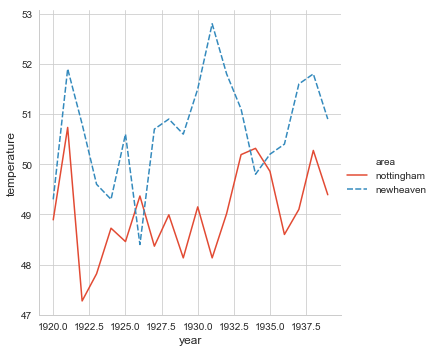

In [164]:
sns.relplot(x = 'year', 
            y = 'temperature', 
            data = temperature, 
            kind = 'line', 
            hue = 'area',
            style = 'area'
           )
plt.show()

### Categorical plots

In [170]:
custom_palette = ["red", "green", "orange", "blue", "yellow", "purple"]
sns.set_palette(custom_palette)

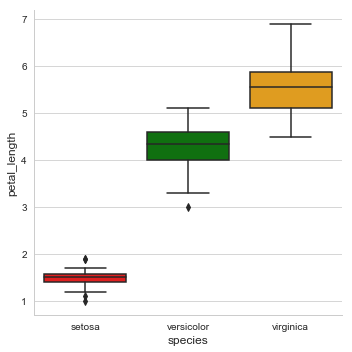

In [171]:
sns.catplot(x = 'species', 
            y = 'petal_length', 
            data = iris, 
            kind = 'box'
           )
plt.show()

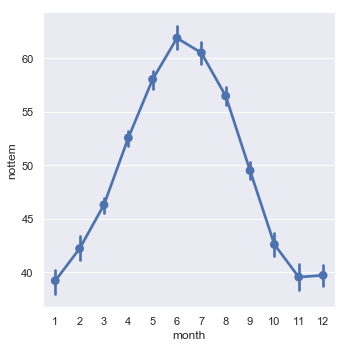

In [189]:
# Set the default Seaborn style and enable the matplotlib color codes.
sns.set(color_codes=True)

sns.catplot(x = 'month', 
            y = 'nottem', 
            data = nottem, 
            kind = 'point'
           )
plt.show()

### Distribution plot

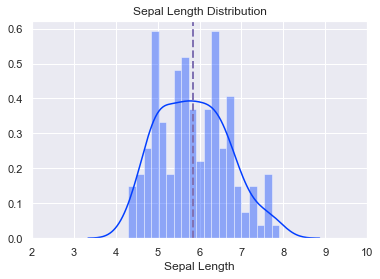

In [201]:
sns.set_palette('bright')

# Create a figure and axes
fig, ax = plt.subplots()

sns.distplot(iris.sepal_length, bins=20, ax = ax)

# Customize the labels and limits
ax.set(xlabel = "Sepal Length",
       xlim = (2,10),
       title = "Sepal Length Distribution"
      )

# Add vertical lines for the mean
ax.axvline(x=iris.sepal_length.mean(), color='m', label='Median', linestyle='--', linewidth=2)

plt.show()

### Regression plot

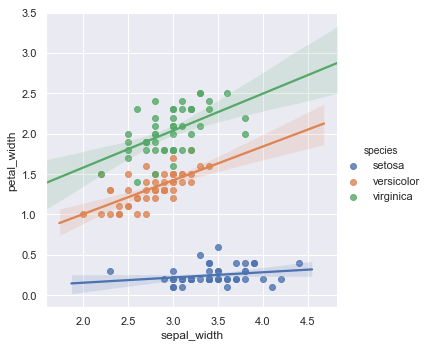

In [222]:
# Set the default seaborn style
sns.set()

sns.lmplot(data = iris,
           x = "sepal_width",
           y = "petal_width",
           hue = "species"
          )

plt.show()

### Heatmap

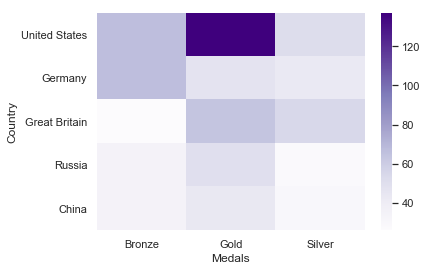

In [212]:
ax = sns.heatmap(medals, cmap="Purples")
ax.set(xlabel = 'Medals')
plt.show()

### Pair grid

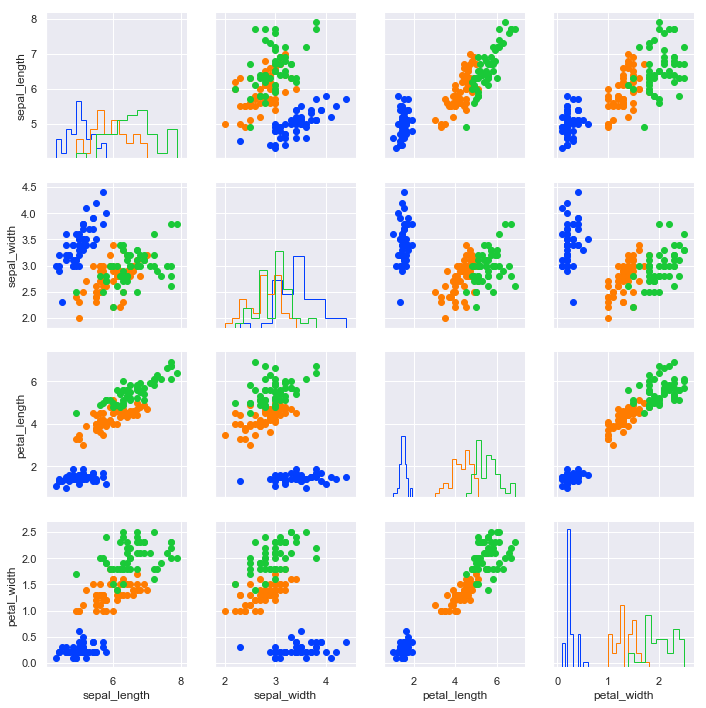

In [218]:
g = sns.PairGrid(iris, vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"], hue = 'species')
g2 = g.map_diag(plt.hist, histtype = 'step')
g3 = g2.map_offdiag(plt.scatter)
plt.show()

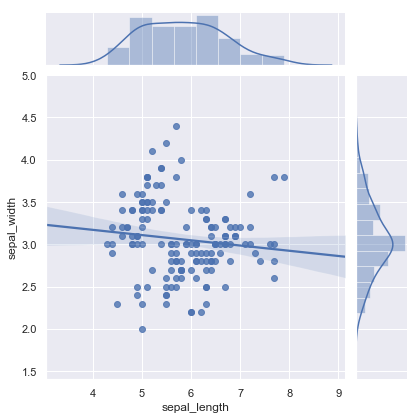

In [235]:
g = sns.jointplot(x = 'sepal_length',
                  y = 'sepal_width',
                  data = iris,
                  kind = 'reg'
                 )

plt.show()